In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [7]:
# !pip install scikit-learn

In [23]:
x = pd.read_csv("xdata.csv",index_col=False,usecols=[1,2])
y = pd.read_csv("ydata.csv",index_col=False,usecols=[1])

X_data,y_data = x.values,y.values.reshape(-1)

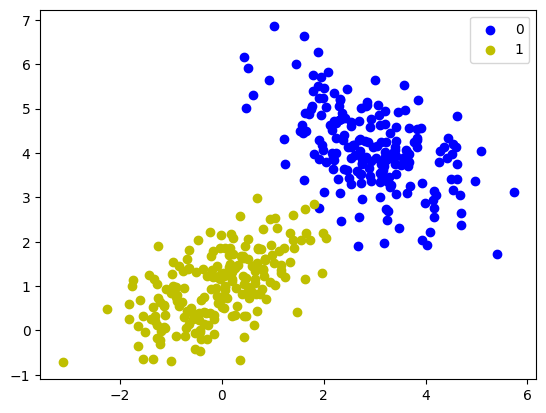

In [25]:
plt.scatter(X_data[y_data == 0][:,0],X_data[y_data == 0][:,1],c='blue',label = '0')
plt.scatter(X_data[y_data == 1][:,0],X_data[y_data == 1][:,1],c='y',label = '1')
plt.legend()
plt.show()

In [55]:
class KNNClassifier:
    def __init__(self,k = 5):
        self.k = k
        
    def fit(self,x,y):
        self.X = x
        self.y = y
        
    def distance_formula(self,p1,p2):
        return np.sqrt(np.sum((p1-p2)**2))
        
    def predict_1(self,t):
        distances = [] #Tuple, 0-> dist, 1-> labels
        for i in range(len(self.X)):
            distances.append((self.distance_formula(t,self.X[i]),self.y[i]))

        distances = sorted(distances,key=lambda x:x[0])[:self.k]
        klabels = []
        for i in range(self.k):
            klabels.append(distances[i][1])

        labels,counts = np.unique(klabels,return_counts=True)
        predLabel = labels[np.argmax(counts)]
        prob = np.max(counts)/self.k
        # print("Probability:", prob)
        
        return predLabel 

    def predict(self,t):
        predictions = []
        for i in range(len(t)):
            predictions.append(self.predict_1(t[i]))
        return np.array(predictions)
        

In [56]:
l = [0,0,1,1,1,0,0,1,1,1,0,1,0,1]
np.unique(l,return_counts=True)

(array([0, 1]), array([6, 8], dtype=int64))

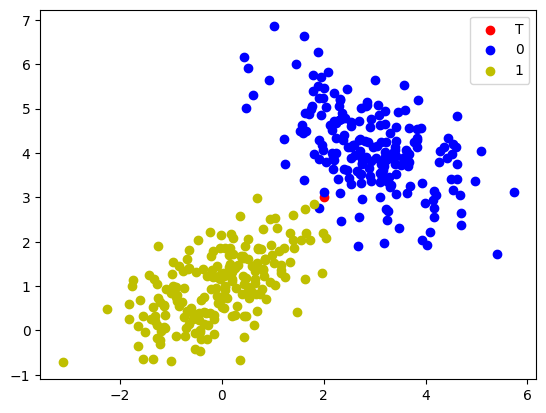

In [57]:
t = np.array([2,3])
plt.scatter(t[0],t[1],c='r',label="T")
plt.scatter(X_data[y_data == 0][:,0],X_data[y_data == 0][:,1],c='blue',label = '0')
plt.scatter(X_data[y_data == 1][:,0],X_data[y_data == 1][:,1],c='y',label = '1')
plt.legend()
plt.show()

In [58]:
clf = KNNClassifier(5)
clf.fit(X_data,y_data)
clf.predict_1(t)

0.0

In [59]:
# x_train,x_test,y_train,y_test = X_data[:320],X_data[320:],y_data[:320],y_data[320:]
x_train,x_test,y_train,y_test = train_test_split(X_data,y_data,train_size=0.8)
# x_train[0]

In [60]:
clf = KNNClassifier(5)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [64]:
acc = np.sum(y_pred == y_test)/y_test.shape[0]

In [66]:
acc = accuracy_score(y_test,y_pred)

In [67]:
acc

1.0

In [69]:
x = pd.read_csv("xdata.csv",index_col=False,usecols=[1,2])
y = pd.read_csv("ydata.csv",index_col=False,usecols=[1])

X_data,y_data = x.values,y.values.reshape(-1)

In [71]:
std = StandardScaler()
X_data = std.fit_transform(X_data)

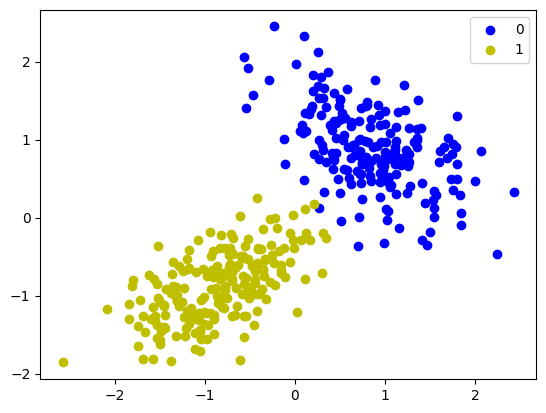

In [72]:
plt.scatter(X_data[y_data == 0][:,0],X_data[y_data == 0][:,1],c='blue',label = '0')
plt.scatter(X_data[y_data == 1][:,0],X_data[y_data == 1][:,1],c='y',label = '1')
plt.legend()
plt.show()

In [73]:
x_train,x_test,y_train,y_test = train_test_split(X_data,y_data,train_size=0.8)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)
acc

1.0